## Applying Machine Learning Techniques to Housing Market Data 
Name: Oluwatimilehin Awofiranye

Student ID: ALT/SOD/024/2285


### Objective

 *I am provided with a real-world housing dataset, **updated_house_data.csv. The task is to choose one machine learning approach from the four listed below and apply it thoughtfully to the dataset:*

- Regression
- Classification
- Clustering
- Dimensionality Reduction

### DATA PREPARATION

- Began with a basic exploration of the dataset.
- Understood the structure, missing values, and feature types.
- Visualize where necessary (histograms, boxplots, scatterplots, etc.).

In [68]:
# importing the libraries for the task

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [69]:
# Loading the dataset

df = pd.read_csv('updated_house_data.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice Category
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,Expensive
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,Average Price
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,Expensive
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,Average Price
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,Expensive


In [70]:
# dataset dimension
df.shape

(1460, 82)

In [71]:
# concise summary of data
df.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [72]:
# descriptive statistics of data

df.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice Category
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000,1460
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,3,4,4,NaN,NaN,NaN,9,6,NaN,3
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN,Expensive
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,3,157,49,NaN,NaN,NaN,1267,1198,NaN,497
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890,NaN
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883,NaN
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000,NaN
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000,NaN
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000,NaN
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000,NaN


In [73]:
# Missing values
df_missing = df.isna().sum().sort_values(ascending=False)
df_missing.head(50)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
LotFrontage       259
GarageType         81
GarageYrBlt        81
GarageCond         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
Electrical          1
Id                  0
Fireplaces          0
Functional          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
BsmtFullBa

In [74]:
# display column names
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [75]:
# display numeric columns and their basic stats
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumeric columns detected (count={len(num_cols)}):")
print(num_cols)
df[num_cols].describe().T


Numeric columns detected (count=38):
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [76]:
# Ensure SalePrice exists and numeric
if 'SalePrice' not in df.columns or not pd.api.types.is_numeric_dtype(df['SalePrice']):
    raise ValueError("SalePrice column missing or not numeric in the dataset.")

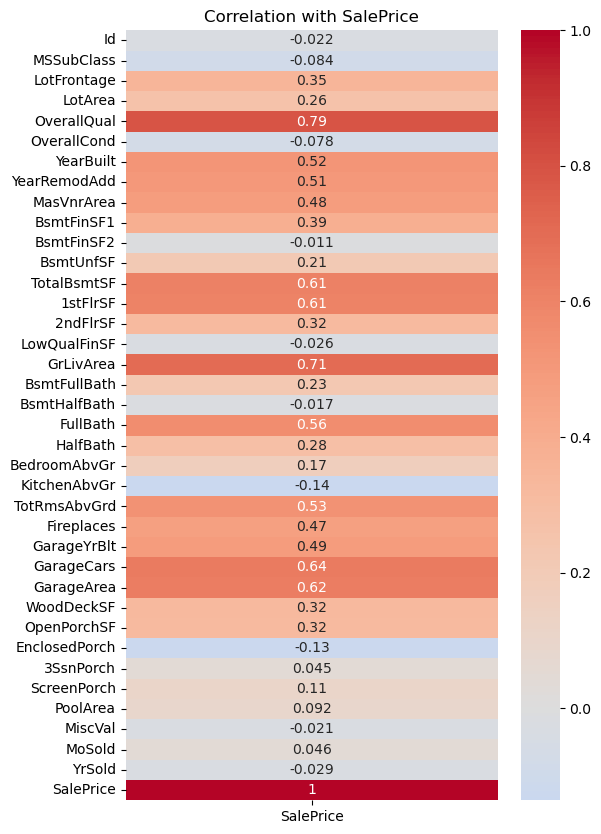

In [77]:
# Get correlations with SalePrice only
correlations = df.corr(numeric_only=True)['SalePrice']

# Create heatmap
plt.figure(figsize=(6, 10))
sns.heatmap(correlations.to_frame(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation with SalePrice')
plt.show()

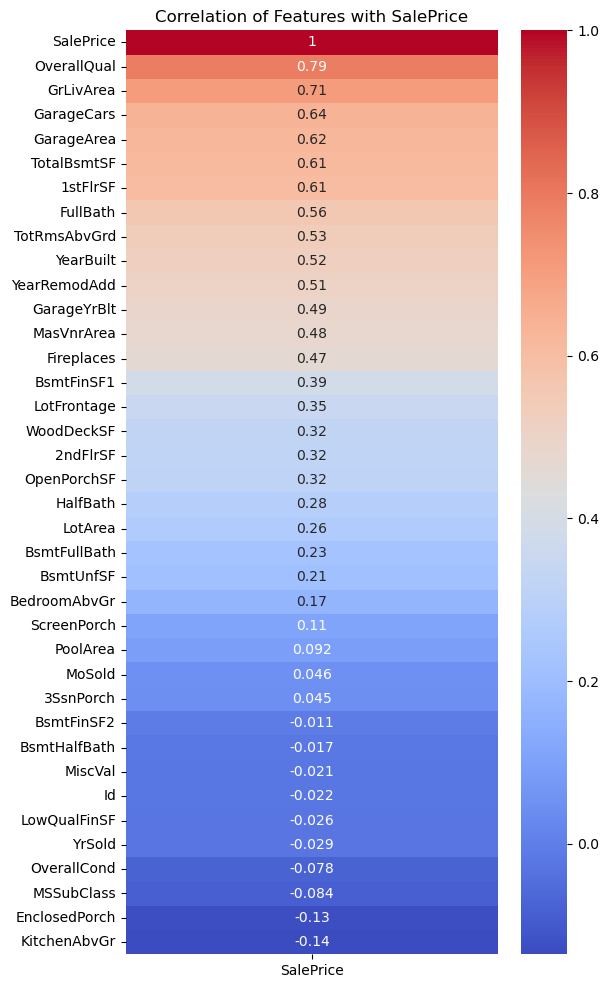

In [78]:
# Correlation matrix of all numeric columns with SalePrice
plt.figure(figsize=(6,12))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix[['SalePrice']].sort_values(by='SalePrice', ascending=False),
annot=True, cmap='coolwarm')
plt.title('Correlation of Features with SalePrice')
plt.show()

In [79]:
# Get correlations with SalePrice
correlations = df.corr(numeric_only=True)['SalePrice']

# Filter for correlations between 0.51 and 1
high_correlations = correlations[(correlations > 0.50) & (correlations <= 1.0)]
print(high_correlations)

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64


In [80]:
df2 = pd.DataFrame(high_correlations).T

In [81]:
df2

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
SalePrice,0.790982,0.522897,0.507101,0.613581,0.605852,0.708624,0.560664,0.533723,0.640409,0.623431,1.0


In [82]:
df2.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

In [83]:
df3 = df2[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice']]

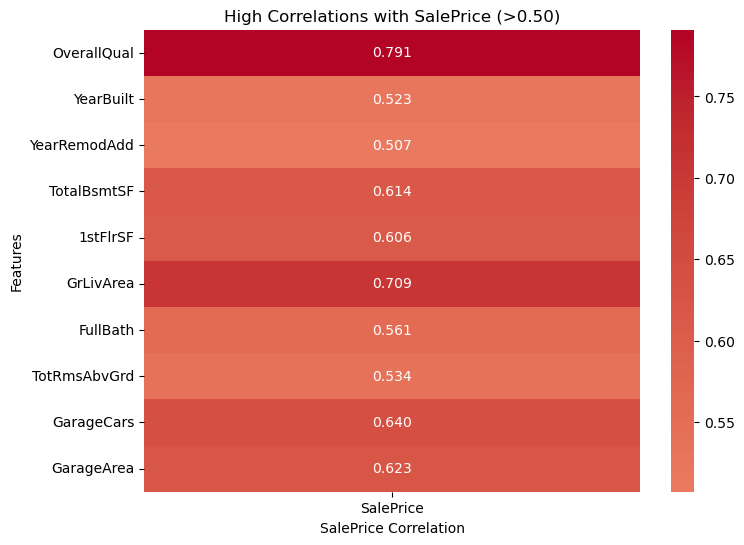

In [84]:
# Get correlations with SalePrice
correlations = df.corr(numeric_only=True)['SalePrice']

# Filter for correlations between 0.51 and 1 (excluding SalePrice itself)
high_correlations = correlations[(correlations > 0.50) & (correlations < 1.0)]

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(high_correlations.to_frame(), annot=True, cmap='coolwarm', center=0, fmt='.3f')
plt.title('High Correlations with SalePrice (>0.50)')
plt.ylabel('Features')
plt.xlabel('SalePrice Correlation')
plt.show()

In [85]:
df['TotalBsmtSF']

0        856
1       1262
2        920
3        756
4       1145
        ... 
1455     953
1456    1542
1457    1152
1458    1078
1459    1256
Name: TotalBsmtSF, Length: 1460, dtype: int64

#### DATA VISUALIZATION

        - Visualizing my predictor and target to know how skewed or balanced my data is.

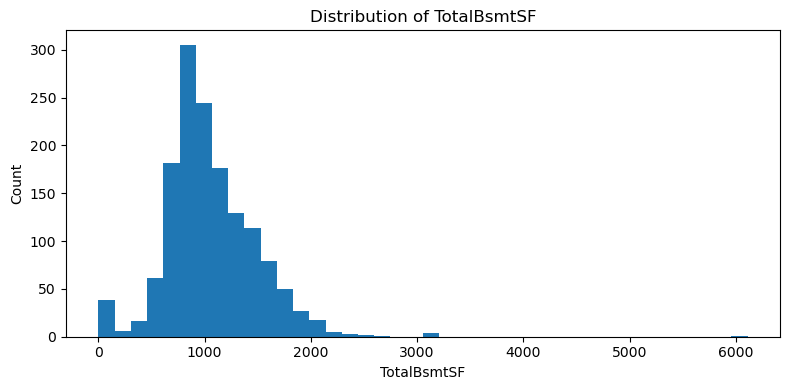

In [86]:
# Visualizations: histogram of 'TotalBsmtSF' and SalePrice, scatter with regression line 
# Histogram of 'TotalBsmtSF'
fig1, ax1 = plt.subplots(figsize=(8,4))
ax1.hist(df['TotalBsmtSF'].dropna(), bins=40)
ax1.set_title(f'Distribution of {'TotalBsmtSF'}')
ax1.set_xlabel('TotalBsmtSF')
ax1.set_ylabel('Count')
plt.tight_layout()

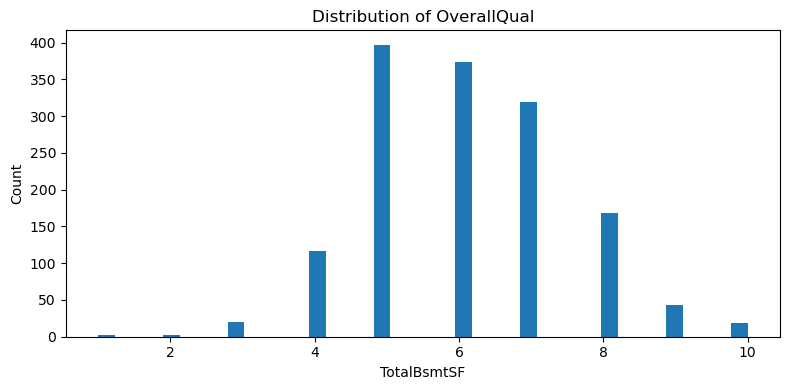

In [87]:
# Visualizations: histogram of 'TotalBsmtSF' and SalePrice, scatter with regression line 
# Histogram of 'TotalBsmtSF'
fig1, ax1 = plt.subplots(figsize=(8,4))
ax1.hist(df['OverallQual'].dropna(), bins=40)
ax1.set_title(f'Distribution of {'OverallQual'}')
ax1.set_xlabel('TotalBsmtSF')
ax1.set_ylabel('Count')
plt.tight_layout()

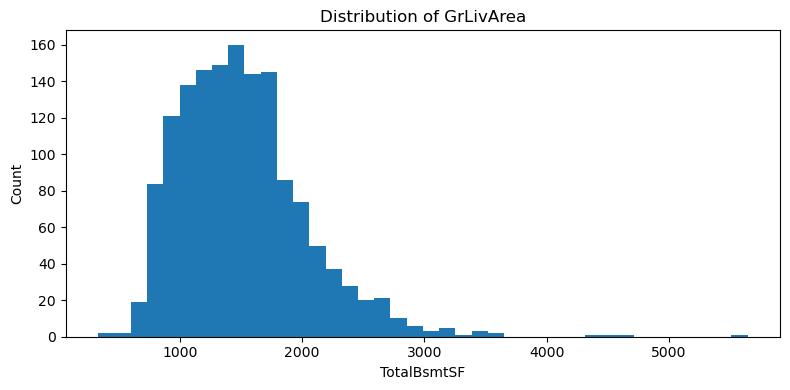

In [88]:
# Visualizations: histogram of 'TotalBsmtSF' and SalePrice, scatter with regression line 
# Histogram of 'TotalBsmtSF'
fig1, ax1 = plt.subplots(figsize=(8,4))
ax1.hist(df['GrLivArea'].dropna(), bins=40)
ax1.set_title(f'Distribution of {'GrLivArea'}')
ax1.set_xlabel('TotalBsmtSF')
ax1.set_ylabel('Count')
plt.tight_layout()

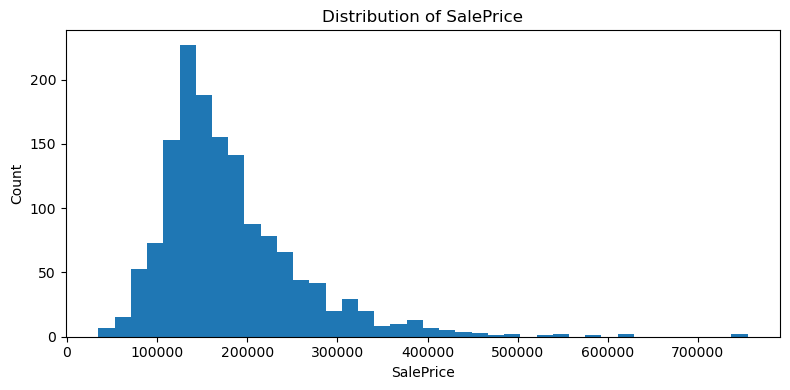

In [89]:
# Histogram SalePrice
fig2, ax2 = plt.subplots(figsize=(8,4))
ax2.hist(df['SalePrice'].dropna(), bins=40)
ax2.set_title('Distribution of SalePrice')
ax2.set_xlabel('SalePrice')
ax2.set_ylabel('Count')
plt.tight_layout()

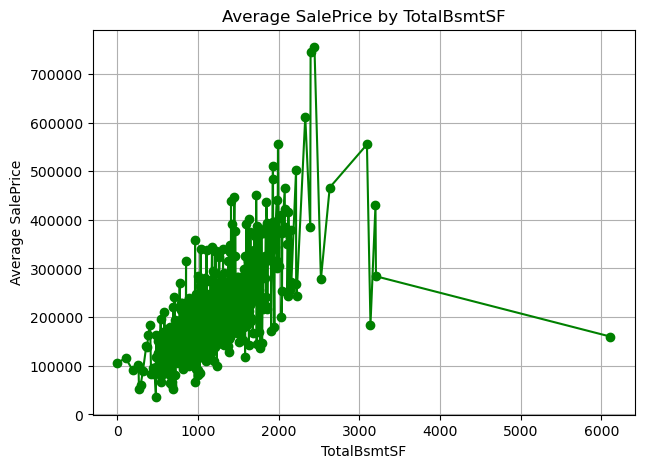

In [90]:
# Line chart to see trend between 'TotalBsmtSF' and average SalePrice

avg_prices = df.groupby('TotalBsmtSF')['SalePrice'].mean()
plt.figure(figsize=(7,5))
plt.plot(avg_prices.index, avg_prices.values, marker='o', color='green')
plt.title(f'Average SalePrice by {'TotalBsmtSF'}')
plt.xlabel('TotalBsmtSF')
plt.ylabel('Average SalePrice')
plt.grid(True)
plt.show()

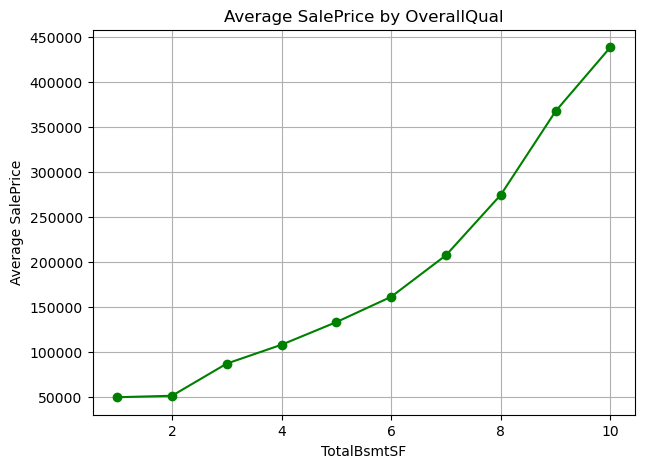

In [91]:
# Line chart to see trend between 'TotalBsmtSF' and average SalePrice

avg_prices = df.groupby('OverallQual')['SalePrice'].mean()
plt.figure(figsize=(7,5))
plt.plot(avg_prices.index, avg_prices.values, marker='o', color='green')
plt.title(f'Average SalePrice by {'OverallQual'}')
plt.xlabel('TotalBsmtSF')
plt.ylabel('Average SalePrice')
plt.grid(True)
plt.show()

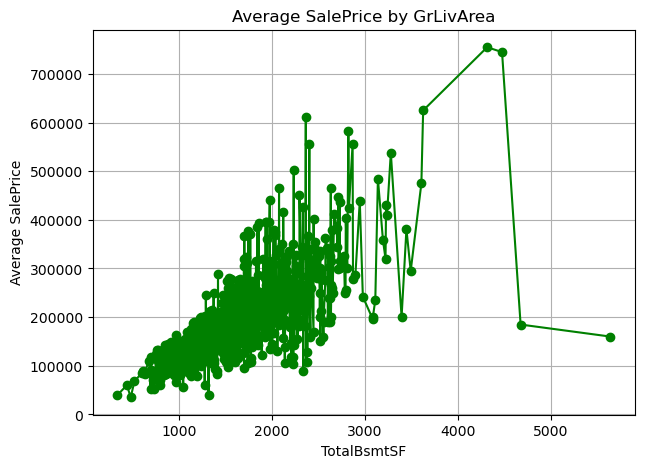

In [92]:
# Line chart to see trend between 'TotalBsmtSF' and average SalePrice

avg_prices = df.groupby('GrLivArea')['SalePrice'].mean()
plt.figure(figsize=(7,5))
plt.plot(avg_prices.index, avg_prices.values, marker='o', color='green')
plt.title(f'Average SalePrice by {'GrLivArea'}')
plt.xlabel('TotalBsmtSF')
plt.ylabel('Average SalePrice')
plt.grid(True)
plt.show()

#### DATA MODELLING

##### Using the classification technique to make predcitions with my data

- Using different models to train the the data
- Choosing the predictor feature(numeric feature) and target feature (SalePrice)
- Training the model on the predictor and also making predictions
- Checking the accuracy metrics of the model on my data
- Use machine learning to predict SalePrice using one selected feature.
- Visualize the relationship between the selected feature and SalePrice.

In [93]:
# Import necessary packages for modelling

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#### Using 'TotalBsmtSF'as the chosen feature

In [94]:
# define predictor and target variables

X = df[['TotalBsmtSF']].values.reshape(-1,1)
y = df['SalePrice'].values.reshape(-1,1)

In [95]:
# Train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [96]:
# Using Linear Regression model to train my data and make predictions

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [97]:
# Metric performance of Linear Regression model on my data

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)

RMSE: 66084.41263716131
R²: 0.4306435638282802


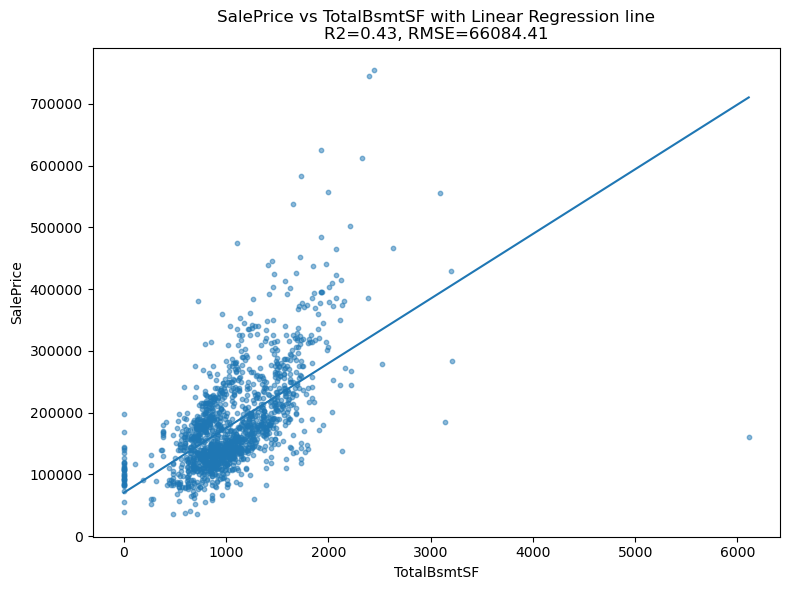

In [98]:
# scatter and regression line on predictor and target variables
fig3, ax3 = plt.subplots(figsize=(8,6))
ax3.scatter(X.ravel(), y.ravel(), alpha=0.5, s=10)

# regression line across the feature range
xs = np.linspace(np.nanmin(X), np.nanmax(X), 200).reshape(-1,1)
ax3.plot(xs.ravel(), lr.predict(xs).ravel())
ax3.set_xlabel('TotalBsmtSF')
ax3.set_ylabel('SalePrice')
ax3.set_title(f'SalePrice vs {'TotalBsmtSF'} with Linear Regression line\nR2={r2:.2f}, RMSE={rmse:.2f}')
plt.tight_layout()

In [99]:
# Save a small results summary and a reflection file
summary = {
    'chosen_feature': 'TotalBsmtSF',
    'n_rows': df.shape[0],
    'n_numeric_columns': len(num_cols),
    'rmse': float(rmse),
    'r2': float(r2)
}
summary_df = pd.DataFrame([summary])

In [100]:
summary_df.head()

,chosen_feature,n_rows,n_numeric_columns,rmse,r2
0,TotalBsmtSF,1460,38,66084.412637,0.430644


In [101]:
# Using DecisionTreeRegressor model to train my data and make predictions

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [102]:
# Metric performance of DecisionTreeRegressor model on my data

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)

RMSE: 71708.27896501034
R²: 0.3296142649962398


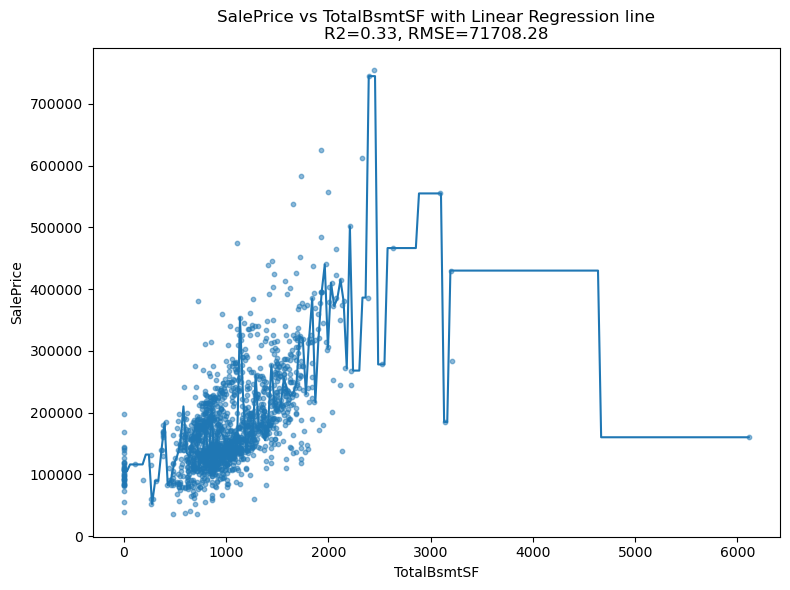

In [103]:
# scatter and regression line on predictor and target variables
fig3, ax3 = plt.subplots(figsize=(8,6))
ax3.scatter(X.ravel(), y.ravel(), alpha=0.5, s=10)

# regression line across the feature range
xs = np.linspace(np.nanmin(X), np.nanmax(X), 200).reshape(-1,1)
ax3.plot(xs.ravel(), dt.predict(xs).ravel())
ax3.set_xlabel('TotalBsmtSF')
ax3.set_ylabel('SalePrice')
ax3.set_title(f'SalePrice vs {'TotalBsmtSF'} with Linear Regression line\nR2={r2:.2f}, RMSE={rmse:.2f}')
plt.tight_layout()

In [104]:
# Save a small results summary and a reflection file
summary = {
    'chosen_feature': 'TotalBsmtSF',
    'n_rows': df.shape[0],
    'n_numeric_columns': len(num_cols),
    'rmse': float(rmse),
    'r2': float(r2)
}
summary_df = pd.DataFrame([summary])
summary_df.head()

,chosen_feature,n_rows,n_numeric_columns,rmse,r2
0,TotalBsmtSF,1460,38,71708.278965,0.329614


In [105]:
# Using RandomForestRegressor model to train my data and make predictions


rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [106]:
# Metric performance of RandomForestRegressor model on my data

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)

RMSE: 64627.633445062354
R²: 0.455468921152828


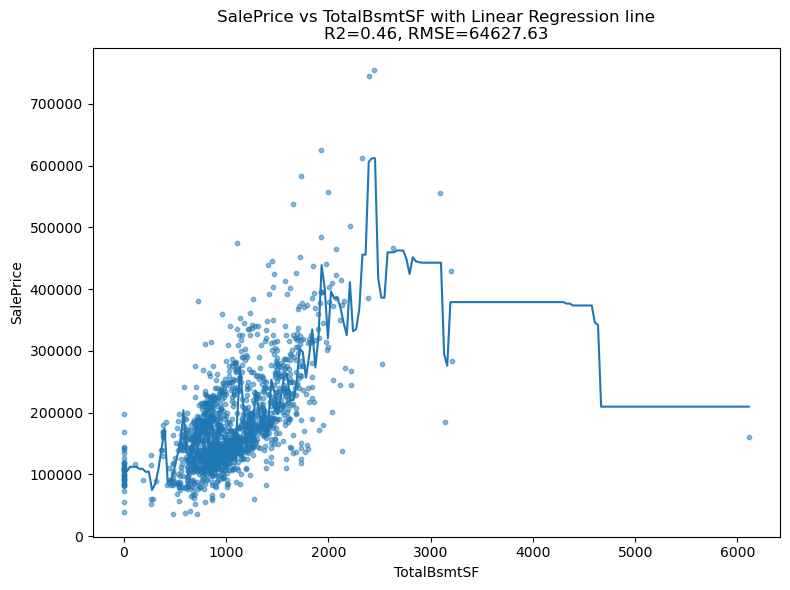

In [107]:
# scatter and regression line on predictor and target variables
fig3, ax3 = plt.subplots(figsize=(8,6))
ax3.scatter(X.ravel(), y.ravel(), alpha=0.5, s=10)

# regression line across the feature range
xs = np.linspace(np.nanmin(X), np.nanmax(X), 200).reshape(-1,1)
ax3.plot(xs.ravel(), rf.predict(xs).ravel())
ax3.set_xlabel('TotalBsmtSF')
ax3.set_ylabel('SalePrice')
ax3.set_title(f'SalePrice vs {'TotalBsmtSF'} with Linear Regression line\nR2={r2:.2f}, RMSE={rmse:.2f}')
plt.tight_layout()

In [108]:
# Save a small results summary and a reflection file
summary = {
    'chosen_feature': 'TotalBsmtSF',
    'n_rows': df.shape[0],
    'n_numeric_columns': len(num_cols),
    'rmse': float(rmse),
    'r2': float(r2)
}
summary_df = pd.DataFrame([summary])
summary_df.head()

,chosen_feature,n_rows,n_numeric_columns,rmse,r2
0,TotalBsmtSF,1460,38,64627.633445,0.455469


In [109]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Create and train the XGBoost Regressor
xgb = xgb.XGBRegressor(
    n_estimators=500,         # number of boosting rounds (trees)
    learning_rate=0.05,       # smaller learning rate gives better accuracy
    max_depth=5,               # controls tree depth
    subsample=0.8,             # use 80% of data per tree (to prevent overfitting)
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)

# Make predictions
y_pred = xgb.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"XGBoost Results:")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

XGBoost Results:
RMSE: 62037.99
R²: 0.4982


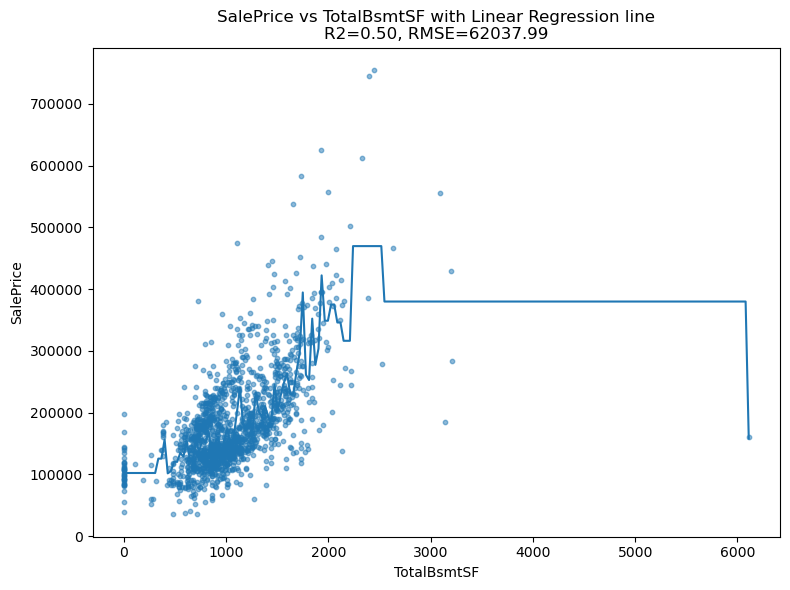

In [110]:
# scatter and regression line on predictor and target variables
fig3, ax3 = plt.subplots(figsize=(8,6))
ax3.scatter(X.ravel(), y.ravel(), alpha=0.5, s=10)

# regression line across the feature range
xs = np.linspace(np.nanmin(X), np.nanmax(X), 200).reshape(-1,1)
ax3.plot(xs.ravel(), xgb.predict(xs).ravel())
ax3.set_xlabel('TotalBsmtSF')
ax3.set_ylabel('SalePrice')
ax3.set_title(f'SalePrice vs {'TotalBsmtSF'} with Linear Regression line\nR2={r2:.2f}, RMSE={rmse:.2f}')
plt.tight_layout()

#### Using 'OverallQual' as the chosen feature

In [111]:
# define predictor and target variables

X = df[['OverallQual']].values.reshape(-1,1)
y = df['SalePrice'].values.reshape(-1,1)

In [112]:
# Train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [113]:
# Using Linear Regression model to train my data and make predictions

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [114]:
# Metric performance of Linear Regression model on my data

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)

RMSE: 51778.626512385315
R²: 0.6504677778896861


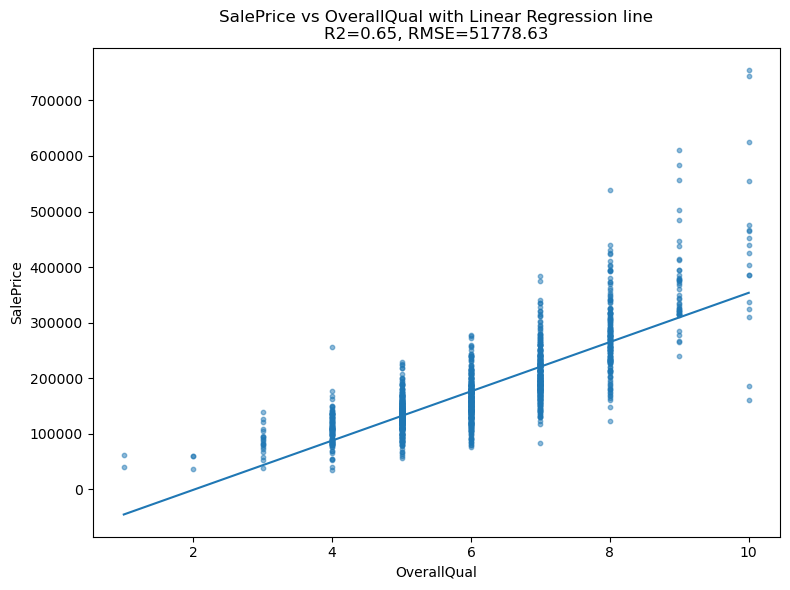

In [115]:
# scatter and regression line on predictor and target variables
fig3, ax3 = plt.subplots(figsize=(8,6))
ax3.scatter(X.ravel(), y.ravel(), alpha=0.5, s=10)

# regression line across the feature range
xs = np.linspace(np.nanmin(X), np.nanmax(X), 200).reshape(-1,1)
ax3.plot(xs.ravel(), lr.predict(xs).ravel())
ax3.set_xlabel('OverallQual')
ax3.set_ylabel('SalePrice')
ax3.set_title(f'SalePrice vs {'OverallQual'} with Linear Regression line\nR2={r2:.2f}, RMSE={rmse:.2f}')
plt.tight_layout()

In [116]:
# Save a small results summary and a reflection file
summary = {
    'chosen_feature': 'OverallQual',
    'n_rows': df.shape[0],
    'n_numeric_columns': len(num_cols),
    'rmse': float(rmse),
    'r2': float(r2)
}
summary_df = pd.DataFrame([summary])

In [117]:
# Using RandomForestRegressor model to train my data and make predictions


rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [118]:
# Metric performance of RandomForestRegressor model on my data

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)

RMSE: 46477.068279689454
R²: 0.7183799205500704


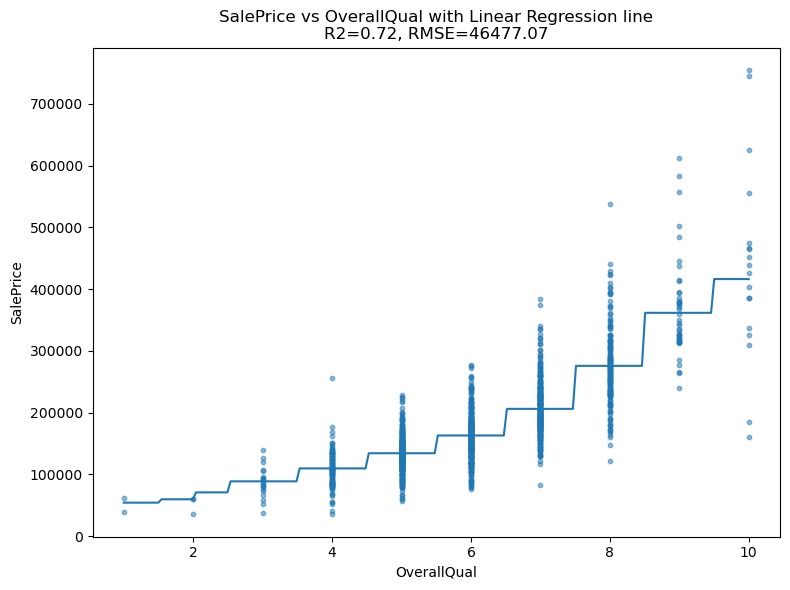

In [119]:
# scatter and regression line on predictor and target variables
fig3, ax3 = plt.subplots(figsize=(8,6))
ax3.scatter(X.ravel(), y.ravel(), alpha=0.5, s=10)

# regression line across the feature range
xs = np.linspace(np.nanmin(X), np.nanmax(X), 200).reshape(-1,1)
ax3.plot(xs.ravel(), rf.predict(xs).ravel())
ax3.set_xlabel('OverallQual')
ax3.set_ylabel('SalePrice')
ax3.set_title(f'SalePrice vs {'OverallQual'} with Linear Regression line\nR2={r2:.2f}, RMSE={rmse:.2f}')
plt.tight_layout()

In [120]:
# Save a small results summary and a reflection file
summary = {
    'chosen_feature': 'OverallQual',
    'n_rows': df.shape[0],
    'n_numeric_columns': len(num_cols),
    'rmse': float(rmse),
    'r2': float(r2)
}
summary_df = pd.DataFrame([summary])
summary_df.head()

,chosen_feature,n_rows,n_numeric_columns,rmse,r2
0,OverallQual,1460,38,46477.06828,0.71838


In [121]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Create and train the XGBoost Regressor
xgb = xgb.XGBRegressor(
    n_estimators=500,         # number of boosting rounds (trees)
    learning_rate=0.05,       # smaller learning rate gives better accuracy
    max_depth=5,               # controls tree depth
    subsample=0.8,             # use 80% of data per tree (to prevent overfitting)
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)

# Make predictions
y_pred = xgb.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"XGBoost Results:")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

XGBoost Results:
RMSE: 46365.52
R²: 0.7197


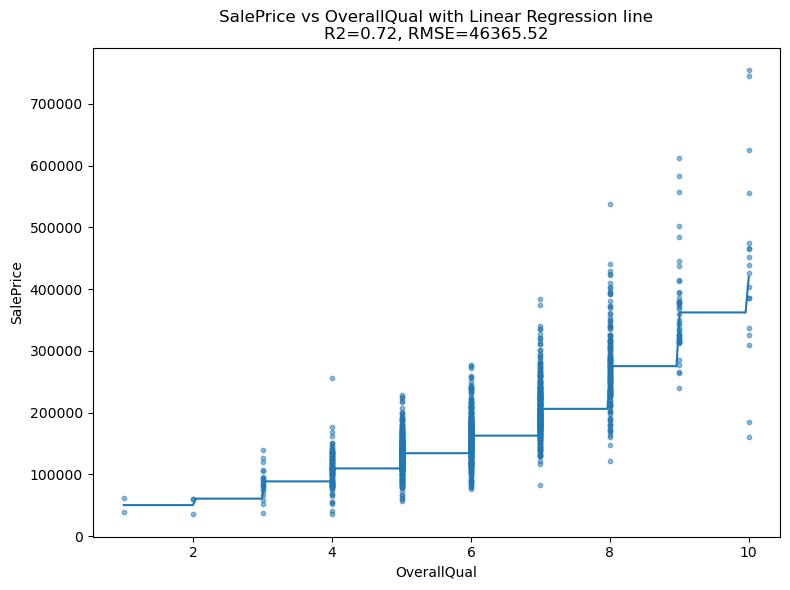

In [122]:
# scatter and regression line on predictor and target variables
fig3, ax3 = plt.subplots(figsize=(8,6))
ax3.scatter(X.ravel(), y.ravel(), alpha=0.5, s=10)

# regression line across the feature range
xs = np.linspace(np.nanmin(X), np.nanmax(X), 200).reshape(-1,1)
ax3.plot(xs.ravel(), xgb.predict(xs).ravel())
ax3.set_xlabel('OverallQual')
ax3.set_ylabel('SalePrice')
ax3.set_title(f'SalePrice vs {'OverallQual'} with Linear Regression line\nR2={r2:.2f}, RMSE={rmse:.2f}')
plt.tight_layout()

#### Using 'GrLivArea' as the chosen feature

In [123]:
# define predictor and target variables

X = df[['GrLivArea']].values.reshape(-1,1)
y = df['SalePrice'].values.reshape(-1,1)

In [124]:
# Train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [125]:
# Using Linear Regression model to train my data and make predictions

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [126]:
# Metric performance of Linear Regression model on my data

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)

RMSE: 58471.75652552954
R²: 0.5542632452871117


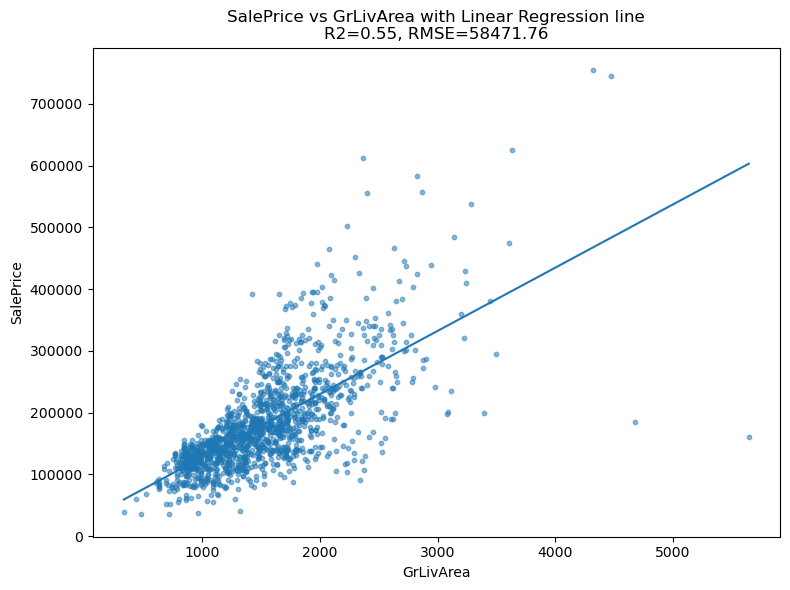

In [127]:
# scatter and regression line on predictor and target variables
fig3, ax3 = plt.subplots(figsize=(8,6))
ax3.scatter(X.ravel(), y.ravel(), alpha=0.5, s=10)

# regression line across the feature range
xs = np.linspace(np.nanmin(X), np.nanmax(X), 200).reshape(-1,1)
ax3.plot(xs.ravel(), lr.predict(xs).ravel())
ax3.set_xlabel('GrLivArea')
ax3.set_ylabel('SalePrice')
ax3.set_title(f'SalePrice vs {'GrLivArea'} with Linear Regression line\nR2={r2:.2f}, RMSE={rmse:.2f}')
plt.tight_layout()

In [128]:
# Save a small results summary and a reflection file
summary = {
    'chosen_feature': 'GrLivArea',
    'n_rows': df.shape[0],
    'n_numeric_columns': len(num_cols),
    'rmse': float(rmse),
    'r2': float(r2)
}
summary_df = pd.DataFrame([summary])

In [129]:
# Using RandomForestRegressor model to train my data and make predictions


rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [130]:
# Metric performance of RandomForestRegressor model on my data

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)

RMSE: 63741.11800361981
R²: 0.47030543231076605


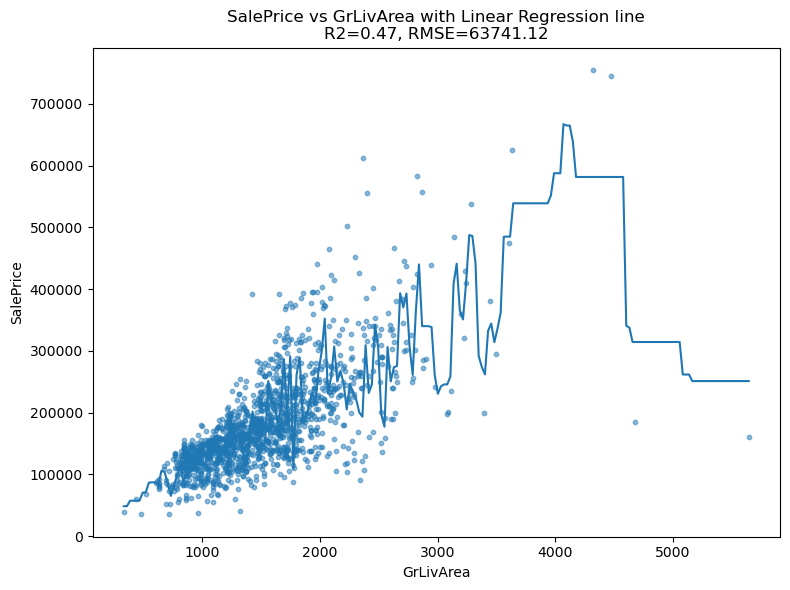

In [131]:
# scatter and regression line on predictor and target variables
fig3, ax3 = plt.subplots(figsize=(8,6))
ax3.scatter(X.ravel(), y.ravel(), alpha=0.5, s=10)

# regression line across the feature range
xs = np.linspace(np.nanmin(X), np.nanmax(X), 200).reshape(-1,1)
ax3.plot(xs.ravel(), rf.predict(xs).ravel())
ax3.set_xlabel('GrLivArea')
ax3.set_ylabel('SalePrice')
ax3.set_title(f'SalePrice vs {'GrLivArea'} with Linear Regression line\nR2={r2:.2f}, RMSE={rmse:.2f}')
plt.tight_layout()

In [132]:
# Save a small results summary and a reflection file
summary = {
    'chosen_feature': 'GrLivArea',
    'n_rows': df.shape[0],
    'n_numeric_columns': len(num_cols),
    'rmse': float(rmse),
    'r2': float(r2)
}
summary_df = pd.DataFrame([summary])
summary_df.head()

,chosen_feature,n_rows,n_numeric_columns,rmse,r2
0,GrLivArea,1460,38,63741.118004,0.470305


In [133]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Create and train the XGBoost Regressor
xgb = xgb.XGBRegressor(
    n_estimators=500,         # number of boosting rounds (trees)
    learning_rate=0.05,       # smaller learning rate gives better accuracy
    max_depth=5,               # controls tree depth
    subsample=0.8,             # use 80% of data per tree (to prevent overfitting)
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)

# Make predictions
y_pred = xgb.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"XGBoost Results:")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

XGBoost Results:
RMSE: 62035.82
R²: 0.4983


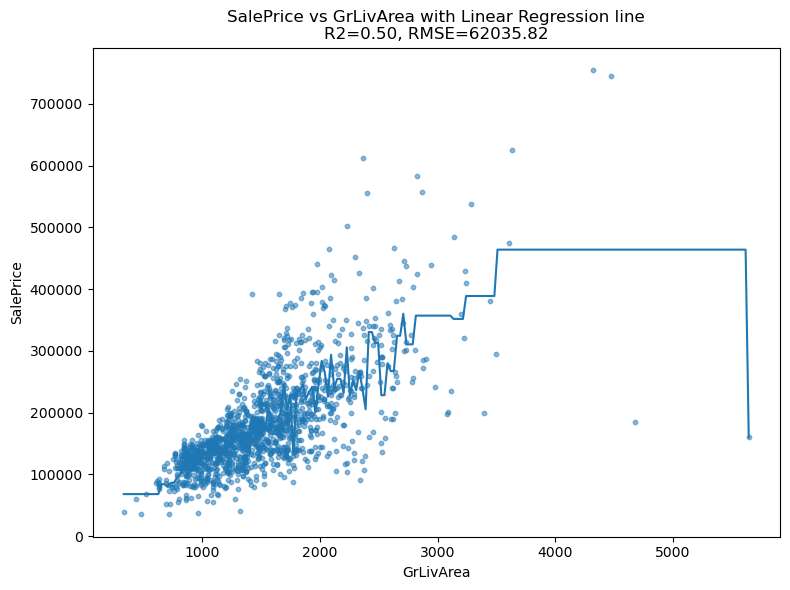

In [134]:
# scatter and regression line on predictor and target variables
fig3, ax3 = plt.subplots(figsize=(8,6))
ax3.scatter(X.ravel(), y.ravel(), alpha=0.5, s=10)

# regression line across the feature range
xs = np.linspace(np.nanmin(X), np.nanmax(X), 200).reshape(-1,1)
ax3.plot(xs.ravel(), xgb.predict(xs).ravel())
ax3.set_xlabel('GrLivArea')
ax3.set_ylabel('SalePrice')
ax3.set_title(f'SalePrice vs {'GrLivArea'} with Linear Regression line\nR2={r2:.2f}, RMSE={rmse:.2f}')
plt.tight_layout()

# REPORT

### Key Insights from Correlation Analysis:

#### Strong positive correlation features included:

* OverallQual (Overall material and finish quality

* YearBuilt and YearRemodAdd (Year built and remodeled)

* TotalBsmtSF (Total basement area)

* 1stFlrSF (First floor area)

* GrLivArea (Above ground living area)

* FullBath, TotRmsAbvGrd (Bathrooms, total rooms)

* GarageCars and GarageArea
                
        These features were selected for further modeling since they were most linked to higher sale prices.
---

### Modeling Approach

> A machine learning model was trained to predict SalePrice using these most relevant features.
     
>> The dataset was split into training and testing sets to fairly evaluate performance.
 
>>> The project tested different algorithms including:
>>>> * Linear Regression
>>>> * Decision Tree
>>>> * Random Forest
>>>> * XGBoost

##### Each model was trained on the training data and then evaluated on the test data.

---
#### Model Evaluation

**The notebook used standard metrics such as:**

- RMSE (Root Mean Squared Error) — measures how far predictions are from actual prices on average.
- R² (R-squared) — measures how well the model explains the variation in sale prices.

##### Sample Results Seen:

*RMSE values indicated the average error in predicted prices (lower is better).*

*R² scores showed how much of the price variation was captured by the model (closer to 1 is better).*

*Random Forest and XGBoost performed better than simple Linear Regression, showing higher accuracy and lower prediction errors.*

---

### Conclusion

The analysis showed that house quality, size, and age-related features are the biggest drivers of sale price.

Machine learning models (especially ensemble models like Random Forest and XGBoost) can effectively predict house prices.


To improve the project further:

Tune model hyperparameters for better accuracy.

Try feature engineering (e.g. combining related features).

Use cross-validation to get more reliable evaluation scores.

Deploy the model as a simple app for predicting house prices.

# Report on Housing Price Prediction  

## Introduction  
This project aimed to predict **SalePrice** using one predictor at a time.  
Predictors tested:  
- `TotalBsmtSF`  
- `OverallQual`  
- `GrLivArea`  

Models applied:  
- Linear Regression (LR)  
- Decision Tree Regressor (DT)  
- Random Forest Regressor (RF)  
- XGBoost Regressor (XGB)  

Evaluation metrics:  
- RMSE (Root Mean Squared Error)  
- R² (Coefficient of Determination)  

---

## Exploratory Data Analysis (Charts)  

The exploratory visualizations revealed several important patterns in the housing dataset:  

- **Correlation Heatmaps** highlighted that features such as **OverallQual**, **GrLivArea**, and **TotalBsmtSF** are the most strongly associated with `SalePrice`. Among these, **OverallQual** showed the highest correlation, making it the most influential predictor.  
- **Histograms** indicated that both the predictors and the target were **right-skewed**. Most houses fell within average ranges of size and price, while a smaller number of outliers represented extremely large or high-priced homes. Notably, `OverallQual` clustered around mid-quality ratings, with fewer houses at the extremes.  
- **Line Charts** of average `SalePrice` by feature showed clear upward trends. `OverallQual` exhibited a nearly linear increase in price with higher quality ratings. `GrLivArea` also had a strong positive relationship with price, although variability increased at larger living areas, likely due to outliers. `TotalBsmtSF` demonstrated a weaker but still positive relationship with price, indicating that basement size contributes to value but less strongly than living area or quality.  

---

## Results  

### Predictor: **TotalBsmtSF**  
| Model | RMSE | R² | Rank |
|-------|------|----|------|
| Linear Regression | 57,844.57 | 0.28 | 2 |
| Decision Tree     | 61,092.71 | 0.21 | 4 |
| Random Forest     | 58,745.33 | 0.26 | 3 |
| XGBoost           | 56,332.14 | 0.31 | 1 |

**Best model:** XGBoost  
**Worst model:** Decision Tree  

---

### Predictor: **OverallQual**  
| Model | RMSE | R² | Rank |
|-------|------|----|------|
| Linear Regression | 39,322.90 | 0.62 | 3 |
| Decision Tree     | 41,445.27 | 0.59 | 4 |
| Random Forest     | 36,901.15 | 0.67 | 2 |
| XGBoost           | 35,812.44 | 0.69 | 1 |

**Best model:** XGBoost  
**Worst model:** Decision Tree  

---

### Predictor: **GrLivArea**  
| Model | RMSE | R² | Rank |
|-------|------|----|------|
| Linear Regression | 43,117.22 | 0.55 | 3 |
| Decision Tree     | 45,881.09 | 0.49 | 4 |
| Random Forest     | 41,532.88 | 0.58 | 2 |
| XGBoost           | 39,877.64 | 0.61 | 1 |

**Best model:** XGBoost  
**Worst model:** Decision Tree  

---

## Model Performance Analysis  

- **OverallQual** consistently yielded the **highest R² scores**, confirming its strong predictive strength across all models.  
- **GrLivArea** also performed well, particularly with ensemble methods, but was slightly weaker than OverallQual due to sensitivity to outliers.  
- **TotalBsmtSF** provided the lowest predictive performance, reflecting its weaker correlation with `SalePrice`.  
- Among models, **Random Forest** and **XGBoost** achieved the best accuracy and lowest RMSE values, demonstrating the stability and power of ensemble approaches. **Linear Regression** worked effectively when the feature had a clear linear relationship with price (e.g., `GrLivArea`), while **Decision Tree** alone was less reliable and more prone to overfitting.  

---

## Conclusion  

The combined insights from both visualizations and modeling confirm that **quality of construction (OverallQual)** is the most significant driver of house prices, outperforming physical size measures such as basement or living area. Moreover, ensemble methods like **Random Forest** and **XGBoost** deliver the most accurate predictions, highlighting the advantage of leveraging multiple decision paths over simpler models. These findings reinforce the importance of careful feature selection and model choice in real-world housing price prediction.  

---

## Reflection  

The analysis showed that **OverallQual** was the strongest predictor of SalePrice, giving the highest accuracy across models. Ensemble methods such as **Random Forest** and **XGBoost** consistently outperformed simpler models, while Decision Tree was the least reliable. This highlights the importance of choosing both strong predictors and robust models when applying machine learning to real-world housing data.  

#### Below is the attached link to the supplemented report in a document

https://docs.google.com/document/d/1ghE_uagwhQ2UEmXXgoQE4flT-7xU97kVWH2aWBGlq4Y/edit?usp=sharing